In [1]:
import matplotlib.pyplot as plt
import math
import random
from IPython.display import clear_output

In [2]:
def update_path_a(x, y, path_a):
    a = True
    while a:
        try:
            direction = str(input("Which direction do you want to go? (u/d/r/l)"))
            a = False
        except: 
            print ("Please enter a valid value:")
            
    a = True  
    while a:
        try:
            steps = int(input("How Much?"))
            a = False
        except:
            print ("Please enter a valid value:")
        
    if direction== 'u':
        y += steps

    elif direction== 'd':
        y = y - steps

    elif direction== 'r':   
        x += steps

    elif direction== 'l':   
        x = x - steps

    path_a.append([x,y])
    
    return (x,y,path_a)

In [3]:
def update_path_b(x_b, y_b, path_b):
    a = True
    while a:
        try:
            direction = str(input("Which direction do you want to go? (u/d/r/l)"))
            a = False
        except: 
            print ("Please enter a valid value:")
            
    a = True  
    while a:
        try:
            steps = int(input("How Much?"))
            a = False
        except:
            print ("Please enter a valid value:")
        
    if direction== 'u':
        y_b += steps

    elif direction== 'd':
        y_b = y_b - steps

    elif direction== 'r':   
        x_b += steps

    elif direction== 'l':   
        x_b = x_b - steps

    path_b.append([x_b,y_b])
    
    return (x_b, y_b, path_b)

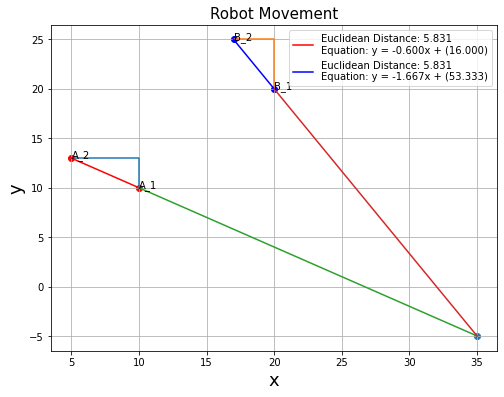

In [4]:
path_a = []
path_b = []

x = 10
y = 10

x_b = 20
y_b = 20

path_a.append([x,y])
path_b.append([x_b,y_b])

#Basic questions
while True:
    choice = str(input('Do you want to continue: y/n'))
    if choice == "y":
        choice_a = str(input('Which robot do you want to move?: a/b'))
        if choice_a =="a":
            x,y,path_a = update_path_a(x, y, path_a)
        elif choice_a == "b":
            x_b,y_b,path_b = update_path_b(x_b, y_b, path_b)
        else :
            print ("Please enter a valid value")
            
    elif choice == "n":
        #declare variables
        x_ = []
        y_ = []
        x__ = []
        y__ = []

        #populate lists
        for i in path_a:
            x_.append(i[0])
            y_.append(i[1])
                
        for i in path_b:
            x__.append(i[0])
            y__.append(i[1])
        
        
        # obtain equation a
        try:    
            a = (y_[-1]-y_[0])/ (x_[-1]-x_[0]) #slope
        except ZeroDivisionError:
            a = 0
        b = y_[-1] - a*x_[-1]
        equation_a = "y = {}x + ({})".format(str( "%.3f" % round(a, 3)),str( "%.3f" % round(b, 3)))
        
        # obtain equation b
        try:
            a_ = (y__[-1]-y__[0])/ (x__[-1]-x__[0]) #slope
        except ZeroDivisionError:
            a_ = 0
        b_ = y__[-1] - a_*x__[-1]
        equation_b = "y = {}x + ({})".format(str( "%.3f" % round(a_, 3)),str( "%.3f" % round(b_, 3)))
        
        #obtain intersection Coordinates
        x_1 = (b - b_) / (a_ - a)
        y_1 = (a * x_1) + b
        
        clear_output()
        
        #plot format
        plt.figure(figsize=(8,6))
        plt.title ("Robot Movement" , fontsize=15)
        plt.xlabel ("x", fontsize=18)
        plt.ylabel ("y" , fontsize=18)

        
        #plot A
        distance_a = math.sqrt((x_[-1]-x_[0])**2 + (y_[-1]-x_[0])**2)
        plt.scatter(x_[0],y_[0], color="red")
        plt.scatter(x_[-1],y_[-1], color="red")
        plt.plot([x_[0],x_[-1]], [y_[0],y_[-1]],color="red", label= "Euclidean Distance: "+str( "%.3f" % round(distance_a, 3))+"\n"+"Equation: "+equation_a)
        plt.annotate ("A_1" , xy=(x_[0]+0.02 ,  y_[0]+0.02), fontsize=10)
        plt.annotate ("A_2" , xy=(x_[-1]+0.02 ,  y_[-1]+0.02), fontsize=10)
        
        #plot B
        distance_b = math.sqrt((x__[-1]-x__[0])**2 + (y__[-1]-x__[0])**2)
        plt.scatter(x__[0],y__[0], color="blue")
        plt.scatter(x__[-1],y__[-1], color="blue")
        plt.plot([x__[0],x__[-1]], [y__[0],y__[-1]],color="blue", label= "Euclidean Distance: "+str( "%.3f" % round(distance_b, 3))+"\n"+"Equation: "+equation_b)
        plt.annotate ("B_1" , xy=(x__[0]+0.02 ,  y__[0]+0.02), fontsize=10)
        plt.annotate ("B_2" , xy=(x__[-1]+0.02 ,  y__[-1]+0.02), fontsize=10)
        
        #Intersection plot
        plt.scatter(x_1 , y_1)
        plt.plot([x_[0],x_1] , [y_[0],y_1])
        plt.plot([x__[0],x_1] , [y__[0],y_1])        
        

        plt.grid()
        plt.legend()
        plt.show()

        break
    else:
        print ("Please enter a valid value")    